## Importation des bibliothèques nécessaires et du dataset

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('./data/CO2_Emissions_Canada.csv')
df.info()

#Ajoute d'un thème
sns.set_theme()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

## Problématique : Quels sont les véhicules les plus polluants au Canada ?

## Plus les véhicules ont de cylindres plus ils sont polluants

<AxesSubplot:xlabel='CO2 Emissions(g/km)', ylabel='Cylinders'>

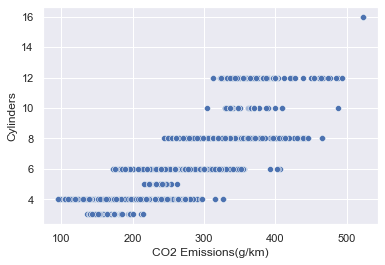

In [45]:
# CO2 Emissions en g/km

sns.scatterplot(x="CO2 Emissions(g/km)", y="Cylinders", data= df)

## Taux de pollution en fonction du carburant utilisé

<AxesSubplot:xlabel='CO2 Emissions(g/km)', ylabel='Fuel Type'>

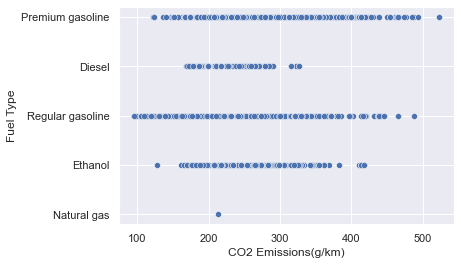

In [47]:
df["Fuel Type"] = df["Fuel Type"].replace(to_replace = ["Z", "D", "X", "E", "N"], value=["Premium gasoline","Diesel","Regular gasoline","Ethanol","Natural gas"])
sns.scatterplot(x="CO2 Emissions(g/km)", y="Fuel Type", data= df)